In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

2024-03-05 09:51:27.521775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 09:51:27.521873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 09:51:27.783880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = "/kaggle/input/ucf-crime-dataset/Train"
test_dir = "/kaggle/input/ucf-crime-dataset/Test"

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64
EPOCHS = 1
LR =  0.00003

In [3]:
train2 = train_dir
test2 = test_dir

In [4]:
train2

'/kaggle/input/ucf-crime-dataset/Train'

# **Implementing a ConvLSTM Network**

In [5]:
# Implementing the ConvLSTM Network
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

print('Done')

Done


In [6]:
train_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(train2, transform=transforms.ToTensor()),
        batch_size=16,
        shuffle=True,
    )
print('done')

done


In [7]:
# Loads the images from train2 dataset and transforms them into tensors.

test_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(test2, transform=transforms.ToTensor()),
        batch_size=16,
        shuffle=False,
    )

in_channels = 3
hidden_channels = 64
num_classes = 14
    
print('Done')

# Why images need to be converted to Tensors?
# Tensors are understood by PyTorch, tensors are more efficient than NumPy arrays. They're optimized for use with PyTorch.

Done


In [8]:
# class ConvLSTM(nn.Module):
#     def __init__(self, in_channels, hidden_channels, num_classes):
#         super(ConvLSTM, self).__init__()
        
# # Convolutional LSTM layer combining the features of CNN and LSTMs
#         self.convlstm = nn.ConvLSTM(in_channels, hidden_channels, 3, batch_first=True)
    
# # Fully connected layer connects all of the neurons in the previous layer to all of the neurons in the next layer
#         self.fc = nn.Linear(hidden_channels, num_classes)

# # The forward function takes an Input Tensor and returns an Output Tensor
#     def forward(self, x):
#         x, _ = self.convlstm(x)
#         x = x[:, -1, :, :, :]
#         x = self.fc(x)
#         return x
    
# # Overall Working: 
# # The forward function first passes the input tensor through the convlstm layer. 
# # The convlstm layer takes the input tensor and produces a sequence of hidden states. 
# # The last hidden state is then passed through the fc layer, which produces a class prediction for the input image.

# print('Done')

In [9]:
# # The train function is a training loop that trains the ConvLSTM model.
# def train(model, train_loader, optimizer, criterion):

# # This for loop iterates over the train_loader, data is the batch of images & target is the batch of labels.
#     for i, (data, target) in enumerate(train_loader):

# # data converted to a float tensor, target to a long tensor
#         data = data.float()
#         target = target.long()
# # Passes data variable thru the model and returns the model's predictions
#         output = model(data)
    
#         loss = criterion(output, target)
#         optimizer.zero_grad()
#         loss.backward()
        
# # optimizer updates the model's parameters
#         optimizer.step()
    
# # The function trains the model by iteratively passing the training data through the model and updating the model's parameters.

# print('Done')

In [10]:
# # The test function is an evaluation loop that evaluates the ConvLSTM model.

# def test(model, test_loader):
# # The correct and total variables are used to track the number of correct predictions and the total number of predictions.
#     correct = 0
#     total = 0

# # Not to track the gradients of parameters during testing as gradients not needed during testing, it would only slow us down.
#     with torch.no_grad():
#         for data, target in test_loader:
#             data = data.float()
#             target = target.long()
#             output = model(data)
#             pred = output.argmax(dim=1, keepdim=True)
#             correct += pred.eq(target.view_as(pred)).sum().item()
#             total += target.size(0)
#     print('Accuracy: {}%'.format(100 * correct / total))
    
# # The function evaluates the model by iteratively passing the test data through the model and calculating the accuracy of the model. 

# print('Done')

In [11]:
# type(train2)

In [12]:
# def string_to_numpy_array(string, dtype=np.float32, sep=' '):
#   """Converts a string to a NumPy array.

#   Args:
#     string: The string to convert.
#     dtype: The data type of the output array.
#     sep: The separator between elements in the string.

#   Returns:
#     A NumPy array representation of the string.
#   """

#   array = np.fromstring(string, dtype=dtype, sep=sep)
#   array = array.reshape((1, array.size))
#   return array

# if __name__ == '__main__':
#   train2_array = string_to_numpy_array(train2)
 

In [13]:
# import torch
# import torch.nn as nn


# class ConvLSTMCell(nn.Module):

#     def __init__(self, in_channels, out_channels, 
#     kernel_size, padding, activation, frame_size):

#         super(ConvLSTMCell, self).__init__()  

#         if activation == "tanh":
#             self.activation = torch.tanh 
#         elif activation == "relu":
#             self.activation = torch.relu
        
#         # Idea adapted from https://github.com/ndrplz/ConvLSTM_pytorch
#         self.conv = nn.Conv2d(
#             in_channels=in_channels + out_channels, 
#             out_channels=4 * out_channels, 
#             kernel_size=kernel_size, 
#             padding=padding)           

#         # Initialize weights for Hadamard Products
#         self.W_ci = nn.Parameter(torch.Tensor(out_channels, *frame_size))
#         self.W_co = nn.Parameter(torch.Tensor(out_channels, *frame_size))
#         self.W_cf = nn.Parameter(torch.Tensor(out_channels, *frame_size))

#     def forward(self, X, H_prev, C_prev):

#         # Idea adapted from https://github.com/ndrplz/ConvLSTM_pytorch
#         conv_output = self.conv(torch.cat([X, H_prev], dim=1))

#         # Idea adapted from https://github.com/ndrplz/ConvLSTM_pytorch
#         i_conv, f_conv, C_conv, o_conv = torch.chunk(conv_output, chunks=4, dim=1)

#         input_gate = torch.sigmoid(i_conv + self.W_ci * C_prev )
#         forget_gate = torch.sigmoid(f_conv + self.W_cf * C_prev )

#         # Current Cell output
#         C = forget_gate*C_prev + input_gate * self.activation(C_conv)

#         output_gate = torch.sigmoid(o_conv + self.W_co * C )

#         # Current Hidden State
#         H = output_gate * self.activation(C)

#         return H, C

In [14]:
# !pip install torch-convlstm
# import torch

# from torch_convlstm import ConvLSTMCell
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# class ConvLSTM(nn.Module):

#     def __init__(self, in_channels, out_channels, 
#     kernel_size, padding, activation, frame_size):

#         super(ConvLSTM, self).__init__()

#         self.out_channels = out_channels

#         # We will unroll this over time steps
#         self.convLSTMcell = ConvLSTMCell(in_channels, out_channels, 
#         kernel_size, padding, activation, frame_size)

#     def forward(self, X):

#         # X is a frame sequence (batch_size, num_channels, seq_len, height, width)

#         # Get the dimensions
#         batch_size, _, seq_len, height, width = X.size()

#         # Initialize output
#         output = torch.zeros(batch_size, self.out_channels, seq_len, 
#         height, width, device=device)
        
#         # Initialize Hidden State
#         H = torch.zeros(batch_size, self.out_channels, 
#         height, width, device=device)

#         # Initialize Cell Input
#         C = torch.zeros(batch_size,self.out_channels, 
#         height, width, device=device)

#         # Unroll over time steps
#         for time_step in range(seq_len):

#             H, C = self.convLSTMcell(X[:,:,time_step], H, C)

#             output[:,:,time_step] = H

#         return output

In [15]:
# import torch.nn as nn
# import torch
# from ConvLSTM import ConvLSTM

# class Seq2Seq(nn.Module):

#     def __init__(self, num_channels, num_kernels, kernel_size, padding, 
#     activation, frame_size, num_layers):

#         super(Seq2Seq, self).__init__()

#         self.sequential = nn.Sequential()

#         # Add First layer (Different in_channels than the rest)
#         self.sequential.add_module(
#             "convlstm1", ConvLSTM(
#                 in_channels=num_channels, out_channels=num_kernels,
#                 kernel_size=kernel_size, padding=padding, 
#                 activation=activation, frame_size=frame_size)
#         )

#         self.sequential.add_module(
#             "batchnorm1", nn.BatchNorm3d(num_features=num_kernels)
#         ) 

#         # Add rest of the layers
#         for l in range(2, num_layers+1):

#             self.sequential.add_module(
#                 f"convlstm{l}", ConvLSTM(
#                     in_channels=num_kernels, out_channels=num_kernels,
#                     kernel_size=kernel_size, padding=padding, 
#                     activation=activation, frame_size=frame_size)
#                 )
                
#             self.sequential.add_module(
#                 f"batchnorm{l}", nn.BatchNorm3d(num_features=num_kernels)
#                 ) 

#         # Add Convolutional Layer to predict output frame
#         self.conv = nn.Conv2d(
#             in_channels=num_kernels, out_channels=num_channels,
#             kernel_size=kernel_size, padding=padding)

#     def forward(self, X):

#         # Forward propagation through all the layers
#         output = self.sequential(X)

#         # Return only the last output frame
#         output = self.conv(output[:,:,-1])
        
#         return nn.Sigmoid()(output)

In [16]:
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.optim import Adam
# from Seq2Seq import Seq2Seq
# from torch.utils.data import DataLoader

# import io
# import imageio
# from ipywidgets import widgets, HBox

# # Use GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
# # Load Data as Numpy Array
# MovingMNIST = np.load('mnist_test_seq.npy').transpose(1, 0, 2, 3)

# # Shuffle Data
# np.random.shuffle(MovingMNIST)

# # Train, Test, Validation splits
# train_data = MovingMNIST[:8000]         
# val_data = MovingMNIST[8000:9000]       
# test_data = MovingMNIST[9000:10000]     

# def collate(batch):

#     # Add channel dim, scale pixels between 0 and 1, send to GPU
#     batch = torch.tensor(batch).unsqueeze(1)     
#     batch = batch / 255.0                        
#     batch = batch.to(device)                     

#     # Randomly pick 10 frames as input, 11th frame is target
#     rand = np.random.randint(10,20)                     
#     return batch[:,:,rand-10:rand], batch[:,:,rand]     


# # Training Data Loader
# train_loader = DataLoader(train_data, shuffle=True, 
#                         batch_size=16, collate_fn=collate)

# # Validation Data Loader
# val_loader = DataLoader(val_data, shuffle=True, 
#                         batch_size=16, collate_fn=collate)

In [18]:
# # Get a batch
# input, _ = next(iter(val_loader))

# # Reverse process before displaying
# input = input.cpu().numpy() * 255.0     

# for video in input.squeeze(1)[:3]:          # Loop over videos
#     with io.BytesIO() as gif:
#         imageio.mimsave(gif,video.astype(np.uint8),"GIF",fps=5)
#         display(HBox([widgets.Image(value=gif.getvalue())]))

In [19]:
# # The input video frames are grayscale, thus single channel
# model = Seq2Seq(num_channels=1, num_kernels=64, 
# kernel_size=(3, 3), padding=(1, 1), activation="relu", 
# frame_size=(64, 64), num_layers=3).to(device)

# optim = Adam(model.parameters(), lr=1e-4)

# # Binary Cross Entropy, target pixel values either 0 or 1
# criterion = nn.BCELoss(reduction='sum')

In [20]:
# num_epochs = 20

# for epoch in range(1, num_epochs+1):
    
#     train_loss = 0                                                 
#     model.train()                                                  
#     for batch_num, (input, target) in enumerate(train_loader, 1):  
#         output = model(input)                                     
#         loss = criterion(output.flatten(), target.flatten())       
#         loss.backward()                                            
#         optim.step()                                               
#         optim.zero_grad()                                           
#         train_loss += loss.item()                                 
#     train_loss /= len(train_loader.dataset)                       

#     val_loss = 0                                                 
#     model.eval()                                                   
#     with torch.no_grad():                                          
#         for input, target in val_loader:                          
#             output = model(input)                                   
#             loss = criterion(output.flatten(), target.flatten())   
#             val_loss += loss.item()                                
#     val_loss /= len(val_loader.dataset)                            

#     print("Epoch:{} Training Loss:{:.2f} Validation Loss:{:.2f}\n".format(
#         epoch, train_loss, val_loss))

# **Implementing a Deep Learning Model**

Dataset has already been imported as train_dir and test_dir

In [21]:
crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories : ",n)

Number of crime categories :  14


In [22]:
crimes={}
train=test=0
for clss in crime_types:
    num=len(os.listdir(os.path.join(train_dir,clss)))
    train+=num
    test+=len(os.listdir(os.path.join(test_dir,clss)))
    
    crimes[clss]=num

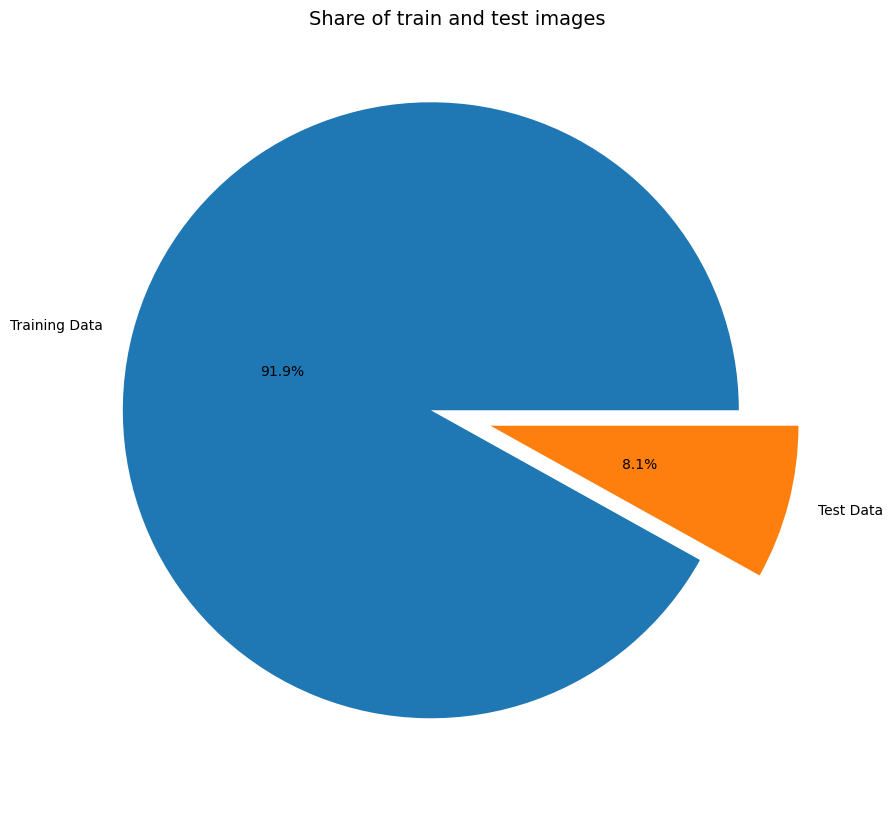

In [23]:
plt.figure(figsize=(15, 10))
plt.pie(x=np.array([train,test]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of train and test images ", fontsize=14);

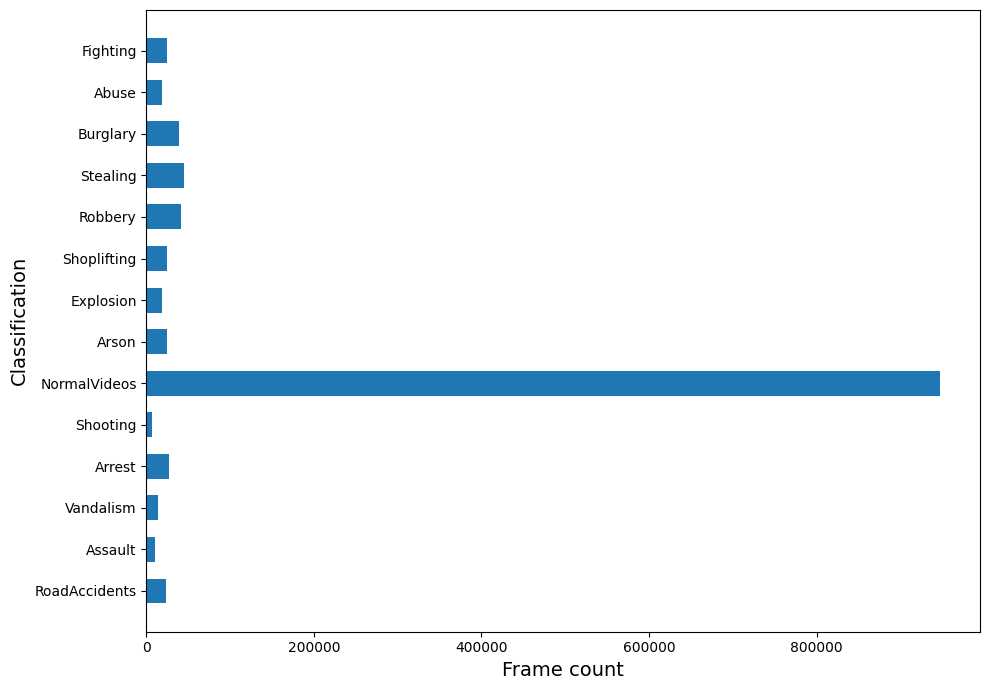

In [24]:
plt.figure(figsize=(10, 7))
plt.barh(list(crimes.keys()), list(crimes.values()), height=0.6, align="center")
plt.yticks(rotation=0)

plt.xlabel("Frame count", fontsize=14)
plt.ylabel("Classification", fontsize=14)
plt.tight_layout()
plt.show()


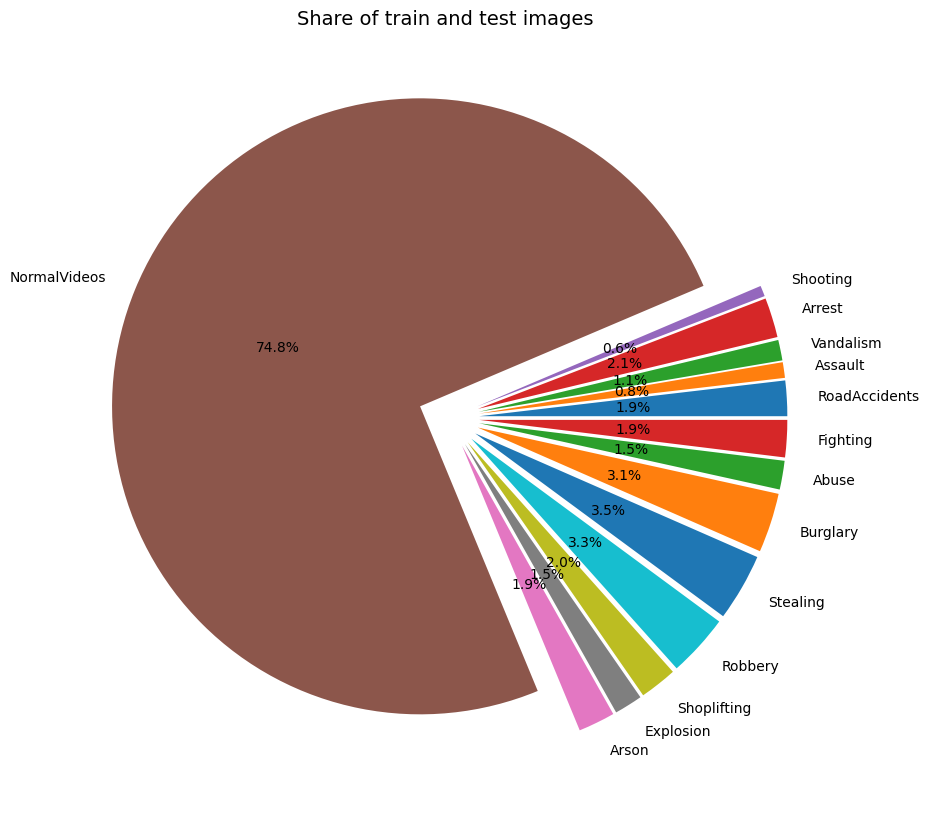

In [25]:
plt.figure(figsize=(15,10))
plt.pie(x=np.array(list(crimes.values())), autopct="%.1f%%", explode=[0.1]*n,labels=list(crimes.keys()), pctdistance=0.5)
plt.title("Share of train and test images ", fontsize=14);

In [26]:
IMG_WIDTH=64
IMG_HEIGHT=64

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [27]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=seed,
)

Found 1266345 files belonging to 14 classes.
Using 1013076 files for training.
Found 1266345 files belonging to 14 classes.
Using 253269 files for validation.
Found 111308 files belonging to 14 classes.


In [28]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")
    
    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False
    
    for layers in base_model.layers[thr:]:
        layers.trainable=True
    
    return base_model

In [29]:
def create_model():
    model=Sequential()
    
    base_model=transfer_learning()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(n,activation="softmax",name="classification"))
    
    model.summary()
    
    return model
    

In [30]:
model=create_model()

model.compile(optimizer="adam", 
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC()])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 5,453,248 (20.80 MB)

 Non-trainable params: 1,584,256 (6.04 MB)

In [31]:
history = model.fit(x = train_set,validation_data=val_set,epochs = EPOCHS)

    1/15830 ━━━━━━━━━━━━━━━━━━━━ 458:49:59 104s/step - auc: 0.5508 - loss: 3.2960

I0000 00:00:1709639489.857757      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709639489.993140      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15830/15830 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - auc: 0.9965 - loss: 0.1558

W0000 00:00:1709641742.736628      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1709641754.016902      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15830/15830 ━━━━━━━━━━━━━━━━━━━━ 2937s 179ms/step - auc: 0.9965 - loss: 0.1558 - val_auc: 0.9998 - val_loss: 0.0158


W0000 00:00:1709642322.194513      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [32]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [33]:
y_pred=model.predict(test_set)

   5/1740 ━━━━━━━━━━━━━━━━━━━━ 1:02 36ms/step

W0000 00:00:1709642584.718711      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1740/1740 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step


W0000 00:00:1709642650.121434      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [34]:
y_pred

array([[1.9074762e-02, 1.5306835e-02, 2.5645306e-02, ..., 3.9179032e-03,
        2.2021588e-02, 1.1027742e-01],
       [2.5448762e-02, 4.1022897e-02, 1.3639713e-02, ..., 4.4819177e-03,
        1.4292651e-02, 3.4693316e-02],
       [1.0251055e-02, 1.3324061e-02, 6.9416594e-03, ..., 2.6048454e-03,
        3.3388638e-03, 2.0542277e-02],
       ...,
       [8.3676208e-17, 2.8330171e-14, 2.9651807e-13, ..., 1.4913832e-15,
        1.3049407e-18, 7.0129340e-18],
       [5.2227814e-12, 1.5038403e-11, 1.2032002e-10, ..., 2.7447605e-10,
        4.5476250e-14, 2.9448115e-13],
       [8.3526805e-13, 3.5841224e-12, 3.2382395e-11, ..., 5.3195881e-12,
        3.1776663e-15, 2.6621297e-14]], dtype=float32)

In [35]:
y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [36]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(crime_types):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

ROC AUC score: 0.8434385928565374


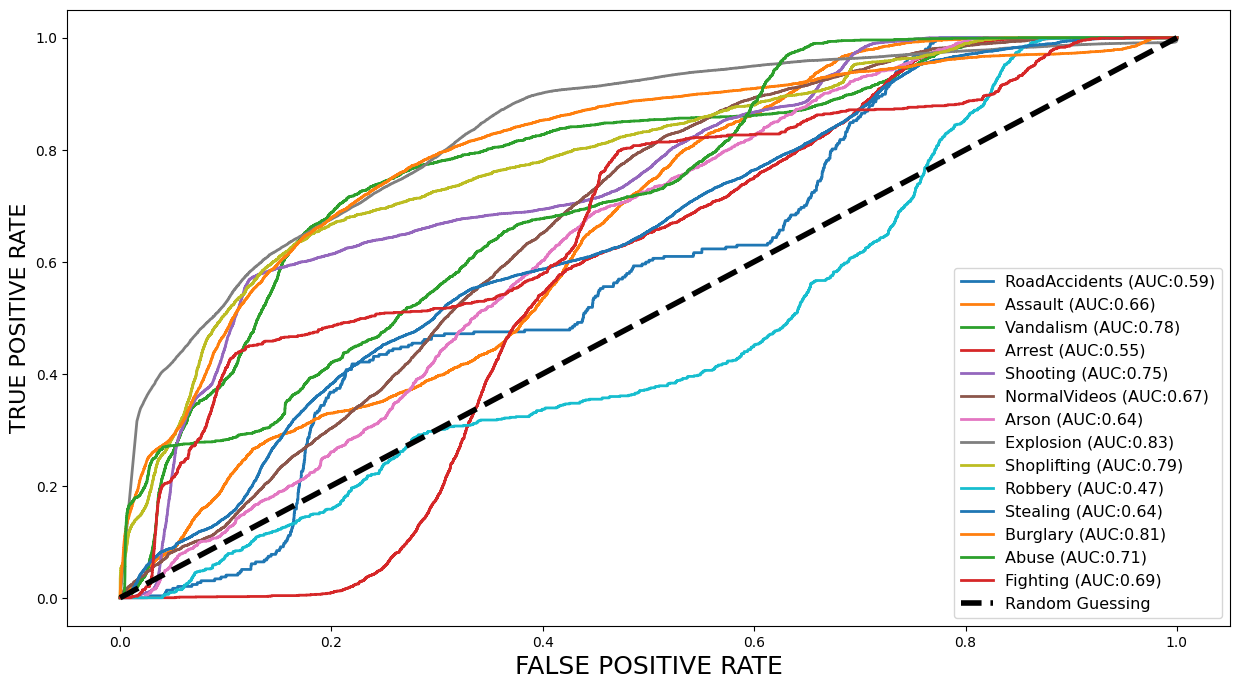

In [37]:
fig, c_ax = plt.subplots(1,1, figsize = (15,8))


print('ROC AUC score:', multiclass_roc_auc_score(y_true , y_pred  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()